In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('/data/luojaa/eukgen/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from core_functions.altair_plots import plot_cumsum_counts

### compute prok search results

In [3]:
KOGS_w_both = "/data/luojaa/uid_stats/KOGs_w_both.csv"
relevant_kogs = set(pd.read_csv(KOGS_w_both)["KOG"])

In [4]:
hhresults_prok_tsv = "/data/luojaa/kegg_db/search_prokseq_vsboth/prokseq_both_hits.tsv"
hhresults_prokdf = pd.read_csv(hhresults_prok_tsv, sep = "\t")

In [5]:
hhresults_prok_knum = hhresults_prokdf[hhresults_prokdf["Query"] != hhresults_prokdf["Target"]]
prok_kogs_set = set(hhresults_prok_knum["Target"])

In [6]:
prok_kogs_s = hhresults_prok_knum["Target"].str.replace(r"_prok", "")

In [7]:
prok_kogs_s = prok_kogs_s.str.replace(r"_euk", "")

In [8]:
hhresults_prok_knum["KOG"] = prok_kogs_s

/tmp/ipykernel_1812359/3491479782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hhresults_prok_knum["KOG"] = prok_kogs_s


In [9]:
eukkog_s = hhresults_prok_knum["Target"].str.contains("euk")
prokkog_s = hhresults_prok_knum["Target"].str.contains("prok")

In [10]:
accessions_prok = hhresults_prok_knum.loc[:,["Query", "Target", "KOG"]]

In [11]:
accessions_prok["euktarget"] = eukkog_s
accessions_prok["proktarget"] = prokkog_s

In [12]:
prok_domainhits = accessions_prok.groupby(["Query", "KOG"])[["euktarget", "proktarget"]].agg(sum).reset_index()

/tmp/ipykernel_1812359/3367171622.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  prok_domainhits = accessions_prok.groupby(["Query", "KOG"])[["euktarget", "proktarget"]].agg(sum).reset_index()


In [13]:
prok_kogs_hit = set(prok_domainhits["KOG"])

In [14]:
relevantkogs_hit_p = relevant_kogs.intersection(prok_kogs_hit)
relevantkogs_missed_prok = relevant_kogs.difference(prok_kogs_hit)

In [19]:
rel_prok_domainhits = prok_domainhits[prok_domainhits["KOG"].isin(relevant_kogs)]

In [20]:
sum(prok_domainhits["euktarget"] & prok_domainhits["proktarget"])

4044406

### compute euk search results

In [120]:
hhresults_eukdf[hhresults_eukdf["Query"] == "XP_026402186.1"]

,Query,Target,Prob,E-value,P-value,Score,SS,Cols,Identities,Similarity,Sum_probs,Query-HMM-start,Query-HMM-end,Template-HMM-start,Template-HMM-end,Template_columns,Template_Neff,Pairwise_cov
5011006,XP_026402186.1,XP_026402186.1,100.0,0.000000e+00,0.000000e+00,99999.0,0.0,500.0,100,100.000,99999.0,1,500.0,1,500.0,500.0,1.0,1.000000
5011007,XP_026402186.1,K18798_prok,100.0,1.200000e-45,1.600000e-49,352.4,0.0,393.0,39,0.606,352.7,80,476.0,25,495.0,496.0,1.1,0.800403


In [21]:
hhresults_euk_tsv = "/data/luojaa/kegg_db/search_eukseq_vsboth/eukseq_both_hits.tsv"
hhresults_eukdf = pd.read_csv(hhresults_euk_tsv, sep = "\t")
hhresults_euk_knum = hhresults_eukdf[hhresults_eukdf["Query"] != hhresults_eukdf["Target"]]
euk_kogs_set = set(hhresults_euk_knum["Target"])

In [22]:
hhresults_euk_knum["KOG"] = hhresults_euk_knum["Target"].str.replace(r"_prok", "").str.replace(r"_euk", "")

/tmp/ipykernel_1812359/1573041488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hhresults_euk_knum["KOG"] = hhresults_euk_knum["Target"].str.replace(r"_prok", "").str.replace(r"_euk", "")


In [23]:
accessions_euk = hhresults_euk_knum.loc[:,["Query", "Target", "KOG"]]
accessions_euk["euktarget"] = hhresults_euk_knum["Target"].str.contains("euk")
accessions_euk["proktarget"] = hhresults_euk_knum["Target"].str.contains("prok")

In [24]:
accessions_euk

,Query,Target,KOG,euktarget,proktarget
10,EP01006P012211,K07542_euk,K07542,True,False
36,EP00078P024431,K19501_euk,K19501,True,False
37,EP00078P024431,K19503_euk,K19503,True,False
41,EP00068P028775,K16745_euk,K16745,True,False
42,EP00068P028775,K16744_euk,K16744,True,False
...,...,...,...,...,...
36922180,EP01004P005612,K00032_prok,K00032,False,True
36922181,EP01004P005612,K15919_euk,K15919,True,False
36922182,EP01004P005612,K22229_prok,K22229,False,True
36922183,EP01004P005612,K25634_prok,K25634,False,True


In [25]:
euk_domainhits = accessions_euk.groupby(["Query", "KOG"])[["euktarget", "proktarget"]].agg(sum).reset_index()

/tmp/ipykernel_1812359/2223746951.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  euk_domainhits = accessions_euk.groupby(["Query", "KOG"])[["euktarget", "proktarget"]].agg(sum).reset_index()


In [26]:
euk_domainhits

,Query,KOG,euktarget,proktarget
0,2P0U_A,K00648,1,0
1,2P0U_A,K00660,1,0
2,2P0U_A,K12644,1,0
3,2P0U_A,K13231,1,0
4,2P0U_A,K13232,1,0
...,...,...,...,...
10964593,prf||1802278A,K04043,1,1
10964594,prf||1802278A,K04044,1,1
10964595,prf||1802278A,K04045,0,1
10964596,prf||1802278A,K09490,1,0


In [27]:
sum(euk_domainhits["euktarget"] & euk_domainhits["proktarget"])

874063

In [28]:
euk_kogs_hit = set(euk_domainhits["KOG"])

In [29]:
relevantkogs_hit = relevant_kogs.intersection(euk_kogs_hit)
relevantkogs_missed = relevant_kogs.difference(euk_kogs_hit)

In [30]:
relevantkogs_missed

{'K08592', 'K14651', 'K18626', 'K19719', 'K19720', 'K22909'}

In [31]:
rel_euk_domainhits = euk_domainhits[euk_domainhits["KOG"].isin(relevant_kogs)]

In [32]:
rel_euk_domainhits

,Query,KOG,euktarget,proktarget
0,2P0U_A,K00648,1,0
18,4B0N_B,K00648,1,0
58,AAA03053.1,K00930,1,1
60,AAA03053.1,K06981,1,1
61,AAB22414.1,K02986,0,1
...,...,...,...,...
10964588,pir||S35986,K02358,1,1
10964589,pir||S35986,K03231,1,1
10964590,pir||S35986,K03242,0,1
10964593,prf||1802278A,K04043,1,1


In [33]:
sum(~rel_euk_domainhits["euktarget"] & rel_euk_domainhits["proktarget"])

532856

### find new relevant KOGs, write accessions

In [34]:
len(euk_kogs_hit), len(prok_kogs_hit)

(23316, 14613)

In [40]:
len(kogs_hitby_both)

12926

In [41]:
kogs_hitby_both = euk_kogs_hit.intersection(prok_kogs_hit)

In [42]:
accessions_prok_rel = accessions_prok[accessions_prok["KOG"].isin(kogs_hitby_both)]
accessions_euk_rel = accessions_euk[accessions_euk["KOG"].isin(kogs_hitby_both)]

In [43]:
accessions_prok_dedup = accessions_prok_rel[["Query", "KOG"]].drop_duplicates()
accessions_euk_dedup = accessions_euk_rel[["Query", "KOG"]].drop_duplicates()

In [44]:
len(set(accessions_prok_rel["Query"]))

7731888

In [45]:
len(set(accessions_euk_rel["Query"]))

1643513

In [46]:
accessions_prok_out = accessions_prok_dedup.groupby("KOG")["Query"].apply(lambda x: "\n".join(x)).reset_index()
accessions_euk_out = accessions_euk_dedup.groupby("KOG")["Query"].apply(lambda x: "\n".join(x)).reset_index()

In [47]:
kogids = accessions_prok_out["KOG"]
queryids = accessions_prok_out["Query"]
for i in range(10925, len(accessions_prok_out)):
    kogid, uid = kogids[i], queryids[i]
    outpath = f"/data/luojaa/eukgen/processing/microcosm_enriched2/{kogid}/{kogid}.target.acc"
    with open(outpath, "w") as outfile:
        print(uid, file=outfile)

In [48]:
kogids = accessions_euk_out["KOG"]
queryids = accessions_euk_out["Query"]
for i in range(len(accessions_euk_out)):
    kogid, uid = kogids[i], queryids[i]
    outpath = f"/data/luojaa/eukgen/processing/microcosm_enriched2/{kogid}/{kogid}.query.acc"
    with open(outpath, "w") as outfile:
        print(uid, file=outfile)

### combine HMM investigation (run last)

In [85]:
plotX, dfX = plot_cumsum_counts(koghmm_eval_e["evp"].sort_values(), x_min = 1, plot_type = "default", title = "promiscuous euk hits")
plotY, dfY = plot_cumsum_counts(koghmm_eval_p["pve"].sort_values(), x_min = 1, plot_type = "default", title = "promiscuous prok hits")
unfiltered_data_prom = pd.concat([dfX, dfY])
plot, data = plot_cumsum_counts(unfiltered_data_prom, formatted_data=True, title='distribution of promiscious hits among KOGs', plot_type='default', x_label = "promiscuous hits per KOG")
plot

alt.LayerChart(...)

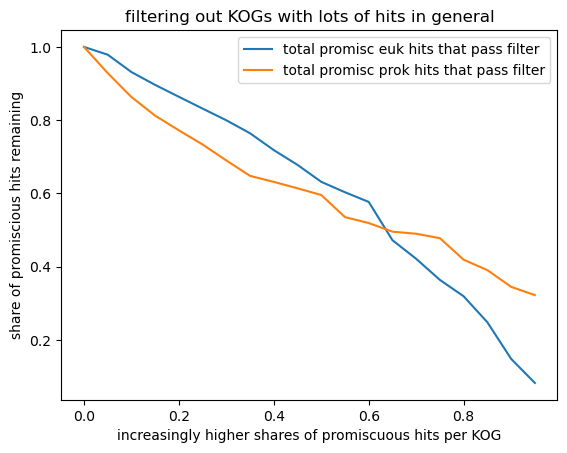

In [89]:
plot_promhits_vs_frackogprom =  [sum(koghmm_eval_e[koghmm_eval_e["evp_norm"] > i/20]["evp"]) / sum(koghmm_eval_e["evp"]) for i in range(0, 20)]
plot_promhits_prok_vs_frackogprom =  [sum(koghmm_eval_p[koghmm_eval_p["pve_norm"] > i/20]["pve"]) / sum(koghmm_eval_p["pve"])for i in range(0, 20)]
plt.plot([i/20 for i in range(0,20)], plot_promhits_vs_frackogprom, label = "total promisc euk hits that pass filter")
plt.plot([i/20 for i in range(0,20)], plot_promhits_prok_vs_frackogprom, label = "total promisc prok hits that pass filter")
plt.xlabel("increasingly higher shares of promiscuous hits per KOG")
plt.ylabel("share of promiscious hits remaining")
plt.title("filtering out KOGs with lots of hits in general")
plt.legend()

<Axes: xlabel='KOG'>

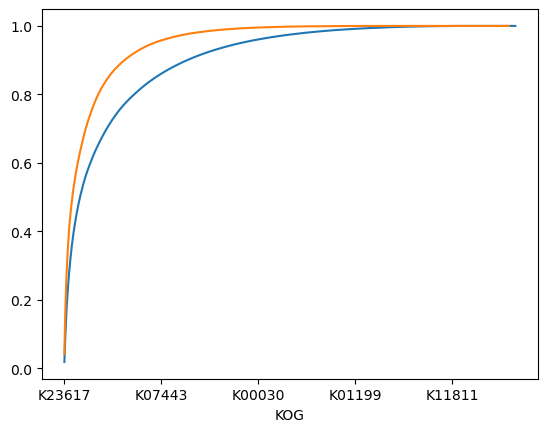

In [162]:
cumsum_hits_norm_euk = koghmm_eval_e["evp"].sort_values(ascending = False).cumsum()/sum(koghmm_eval_e["evp"])
#cumsum_hits_norm_euk.plot()
cumsum_hits_norm_prok = koghmm_eval_p["pve"].sort_values(ascending = False).cumsum()/sum(koghmm_eval_p["pve"])
cumsum_hits_norm_euk.plot(label = "normalized cumsum of promiscious prokaryotic hits against euk kegg profiles")
cumsum_hits_norm_prok.plot()

### merge dataframes

In [107]:
tmp_eval_both = pd.merge(tmp_eval, tmp_eval_e, on = "KOG", how = "outer").fillna(0).loc[:, ["pvp", "pvboth", "pve", "pvp_norm", "pvboth_norm", "pve_norm", "evp", "evboth", "eve", "evp_norm", "evboth_norm", "eve_norm"]]

In [153]:
tmp_eval_both.to_csv("/data/luojaa/kegg_db/promisc_stats.search_both.tsv", sep = "\t")

In [128]:
# look into eukaryotic profiles first (high pve_norm)
eval_highpve = tmp_eval_both[tmp_eval_both["pve_norm"] > .5]

In [125]:
eval_highpve.mean()

pvp             149.000000
pvboth          371.068966
pve            2500.522167
pvp_norm          0.080028
pvboth_norm       0.097016
pve_norm          0.822956
evp              41.714286
evboth          203.886700
eve            1437.261084
evp_norm          0.037687
evboth_norm       0.157495
eve_norm          0.804818
dtype: float64

In [155]:
tmp_eval_both["pveuk_norm

,pvp,pvboth,pve,pvp_norm,pvboth_norm,pve_norm,evp,evboth,eve,evp_norm,evboth_norm,eve_norm
KOG,,,,,,,,,,,,
K00069,0.0,47.0,15489.0,0.000000,0.003025,0.996975,4.0,210.0,3721.0,0.001017,0.053367,0.945616
K00079,41.0,1954.0,6340.0,0.004919,0.234433,0.760648,193.0,2317.0,3304.0,0.033196,0.398521,0.568283
K00084,52.0,252.0,1977.0,0.022797,0.110478,0.866725,3.0,996.0,2295.0,0.000911,0.302368,0.696721
K00103,34.0,2334.0,4047.0,0.005300,0.363835,0.630865,56.0,1011.0,560.0,0.034419,0.621389,0.344192
K00109,6.0,0.0,8350.0,0.000718,0.000000,0.999282,18.0,0.0,1558.0,0.011421,0.000000,0.988579
...,...,...,...,...,...,...,...,...,...,...,...,...
K24510,1.0,0.0,16.0,0.058824,0.000000,0.941176,1.0,0.0,332.0,0.003003,0.000000,0.996997
K24745,10.0,0.0,429.0,0.022779,0.000000,0.977221,114.0,0.0,4805.0,0.023175,0.000000,0.976825
K24835,28.0,37.0,79.0,0.194444,0.256944,0.548611,35.0,84.0,345.0,0.075431,0.181034,0.743534


Text(0, 0.5, 'share of euk hits vs KOG that are promisc')

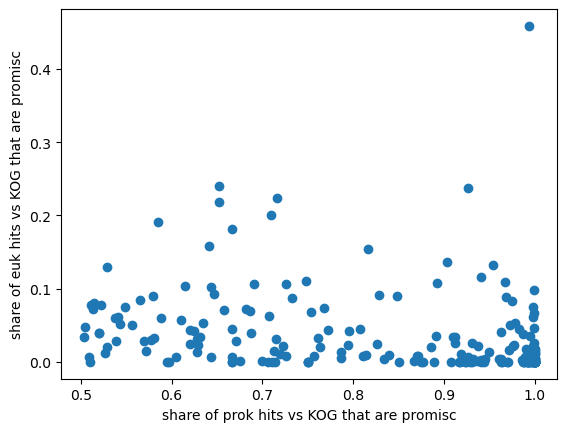

In [156]:
plt.scatter(eval_highpve["pve_norm"], eval_highpve["evp_norm"])
plt.xlabel("share of prok hits vs KOG that are promisc")
plt.ylabel("share of euk hits vs KOG that are promisc")

In [127]:
# look into prokaryotic profiles (high evp_norm)
eval_highevp = tmp_eval_both[tmp_eval_both["evp_norm"] > .5]

In [147]:
tmp_eval_both

,pvp,pvboth,pve,pvp_norm,pvboth_norm,pve_norm,evp,evboth,eve,evp_norm,evboth_norm,eve_norm
KOG,,,,,,,,,,,,
K00001,35050.0,5024.0,14.0,0.874326,0.125324,0.000349,8160.0,1243.0,181.0,0.851419,0.129695,0.018886
K00002,2116.0,20415.0,465.0,0.092016,0.887763,0.020221,1210.0,5727.0,457.0,0.163646,0.774547,0.061807
K00003,142.0,2127.0,400.0,0.053203,0.796928,0.149869,125.0,364.0,173.0,0.188822,0.549849,0.261329
K00004,28682.0,9548.0,66.0,0.748956,0.249321,0.001723,8254.0,1370.0,202.0,0.840016,0.139426,0.020558
K00005,3973.0,6134.0,40.0,0.391544,0.604514,0.003942,215.0,437.0,9.0,0.325265,0.661120,0.013616
...,...,...,...,...,...,...,...,...,...,...,...,...
K25767,2.0,47.0,48.0,0.020619,0.484536,0.494845,0.0,1.0,2.0,0.000000,0.333333,0.666667
K26273,192.0,0.0,0.0,1.000000,0.000000,0.000000,8.0,1.0,83.0,0.086957,0.010870,0.902174
K26400,378.0,0.0,682.0,0.356604,0.000000,0.643396,6.0,0.0,53.0,0.101695,0.000000,0.898305


Text(0.5, 1.0, "100 'relevant' KOGs with prokaryotic profiles receiving highest # of promisc hits")

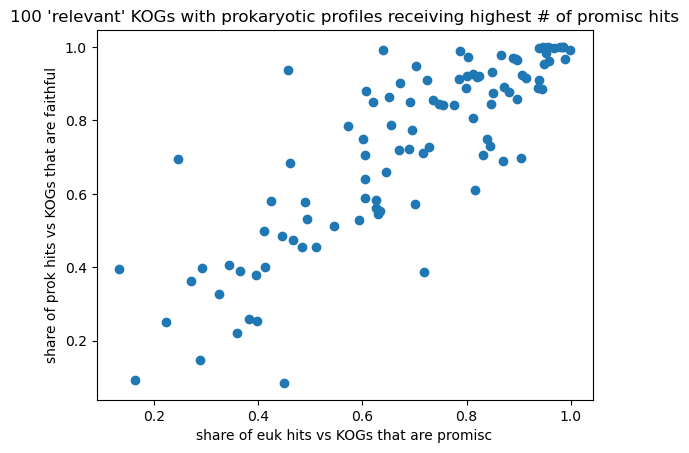

In [157]:
plt.scatter(tmp_eval_both.sort_values("evp", ascending = False)[:100]["evp_norm"], tmp_eval_both.sort_values("evp", ascending = False)[:100]["pvp_norm"])
plt.xlabel("share of euk hits vs KOGs that are promisc")
plt.ylabel("share of prok hits vs KOGs that are faithful")
plt.title("100 'relevant' KOGs with prokaryotic profiles receiving highest # of promisc hits")

In [149]:
sum(tmp_eval_both.sort_values("evp", ascending = False)[:100]["evp"])

287775.0

In [135]:
sum(eval_highevp["evp"])

335983.0

In [160]:
# weird inverted cases
eval_highevp[eval_highevp["pve_norm"] > .3]

,pvp,pvboth,pve,pvp_norm,pvboth_norm,pve_norm,evp,evboth,eve,evp_norm,evboth_norm,eve_norm
KOG,,,,,,,,,,,,
K00995,4611.0,0.0,2207.0,0.676298,0.000000,0.323702,155.0,0.0,148.0,0.511551,0.000000,0.488449
K01113,124.0,100.0,196.0,0.295238,0.238095,0.466667,132.0,7.0,26.0,0.800000,0.042424,0.157576
K03163,25.0,0.0,17.0,0.595238,0.000000,0.404762,127.0,7.0,43.0,0.717514,0.039548,0.242938
K19519,51.0,0.0,28.0,0.645570,0.000000,0.354430,135.0,0.0,125.0,0.519231,0.000000,0.480769
K22843,345.0,33.0,191.0,0.606327,0.057996,0.335677,133.0,6.0,38.0,0.751412,0.033898,0.214689


Text(0, 0.5, 'share of prok hits vs KOG that are promisc')

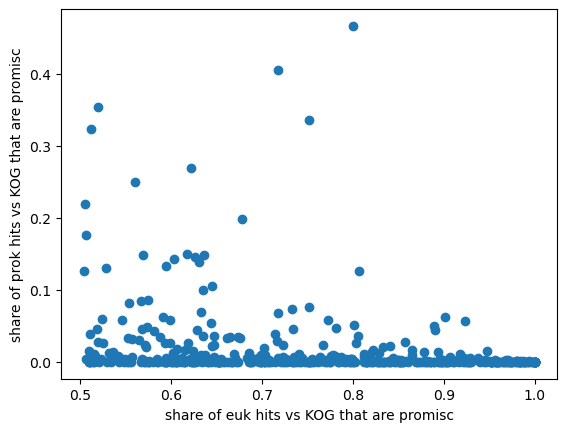

In [158]:
plt.scatter(eval_highevp["evp_norm"], eval_highevp["pve_norm"])
plt.xlabel("share of euk hits vs KOG that are promisc")
plt.ylabel("share of prok hits vs KOG that are promisc")

In [129]:
eval_highevp.mean()

pvp            5832.332599
pvboth         1118.444934
pve              93.156388
pvp_norm          0.873537
pvboth_norm       0.107344
pve_norm          0.016916
evp             740.050661
evboth          157.231278
eve              83.077093
evp_norm          0.752866
evboth_norm       0.091725
eve_norm          0.155409
dtype: float64

In [117]:
euk_domainhits[euk_domainhits["KOG"] == "K18798"]

,Query,KOG,euktarget,proktarget
32174,EP00002P038413,K18798,1,1
57569,EP00004P022637,K18798,1,1
133338,EP00011P008034,K18798,1,1
138633,EP00012P000615,K18798,1,1
188976,EP00019P001914,K18798,1,0
...,...,...,...,...
10816776,XP_026402186.1,K18798,0,1
10874919,XP_030850674.1,K18798,1,1
10886632,XP_031480293.1,K18798,0,1
10929886,XP_629365.1,K18798,0,1


### investigate low quality euk HMMs

In [50]:
euk_bothdomainhits = euk_domainhits[euk_domainhits["euktarget"].astype(bool) & euk_domainhits["proktarget"].astype(bool)]
euk_eukdomainhits = euk_domainhits[euk_domainhits["euktarget"].astype(bool) & ~euk_domainhits["proktarget"].astype(bool)]
euk_prokdomainhits = euk_domainhits[~euk_domainhits["euktarget"].astype(bool) & euk_domainhits["proktarget"].astype(bool)]

In [51]:
euk_justeuk = euk_eukdomainhits[euk_eukdomainhits["KOG"].isin(relevant_kogs)]
euk_hitboth = euk_bothdomainhits[euk_bothdomainhits["KOG"].isin(relevant_kogs)]
euk_missedeuk = euk_prokdomainhits[euk_prokdomainhits["KOG"].isin(relevant_kogs)]

In [52]:
evp_counts = euk_missedeuk["KOG"].value_counts()
evboth_counts = euk_hitboth["KOG"].value_counts()
eve_counts = euk_justeuk["KOG"].value_counts()
tmp_merge_e = pd.merge(eve_counts, evboth_counts, how = "outer", on = "KOG")
tmp_eval_e = pd.merge(tmp_merge_e, evp_counts, how = "outer", on = "KOG").rename(columns={"count_x": "eve", "count_y": "evboth", "count": "evp"}).fillna(0)

In [65]:
tmp_eval_e["evp_norm"] = tmp_eval_e["evp"] / (tmp_eval_e["evp"] + tmp_eval_e["evboth"] + tmp_eval_e["eve"])
tmp_eval_e["evboth_norm"] = tmp_eval_e["evboth"] / (tmp_eval_e["evp"] + tmp_eval_e["evboth"] + tmp_eval_e["eve"])
tmp_eval_e["eve_norm"] = tmp_eval_e["eve"] / (tmp_eval_e["evp"] + tmp_eval_e["evboth"] + tmp_eval_e["eve"])

In [83]:
koghmm_eval_e = tmp_eval_e.sort_values(["eve_norm", "eve"], ascending = False)
koghmm_eval_e_asc = tmp_eval_e.sort_values(["evp_norm", "evp"])
koghmm_eval_e

,eve,evboth,evp,evp_norm,evboth_norm,eve_norm
KOG,,,,,,
K23617,5771.0,0.0,0.0,0.000000,0.000000,1.0
K01363,3224.0,0.0,0.0,0.000000,0.000000,1.0
K07873,2520.0,0.0,0.0,0.000000,0.000000,1.0
K01381,2009.0,0.0,0.0,0.000000,0.000000,1.0
K02943,1824.0,0.0,0.0,0.000000,0.000000,1.0
...,...,...,...,...,...,...
K20844,0.0,5.0,1.0,0.166667,0.833333,0.0
K21830,0.0,4.0,4.0,0.500000,0.500000,0.0
K22278,0.0,0.0,186.0,1.000000,0.000000,0.0


In [67]:
sum(koghmm_eval_p[koghmm_eval_p["pve_norm"] > .9]["pve"])

293909.0

In [97]:
koghmm_eval_e = tmp_eval_e.sort_values(["eve_norm", "eve"], ascending = False)
koghmm_eval_e_asc = tmp_eval_e.sort_values(["evp_norm", "evp"])

<Axes: xlabel='KOG'>

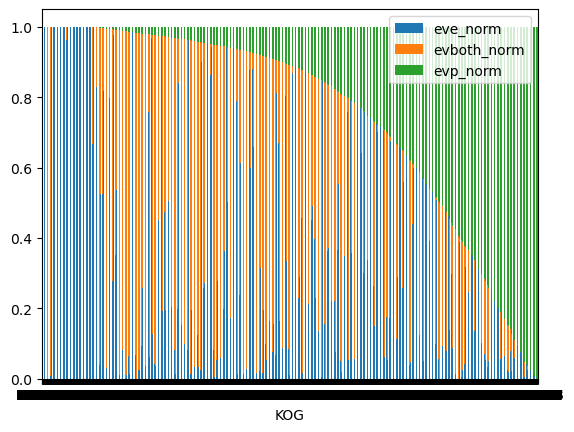

In [95]:
koghmm_eval_e_asc_vis = koghmm_eval_e_asc.loc[:, ["eve_norm", "evboth_norm", "evp_norm"]]
koghmm_eval_e_asc_vis.plot.bar(rot=0, stacked=True)

<Axes: xlabel='KOG'>

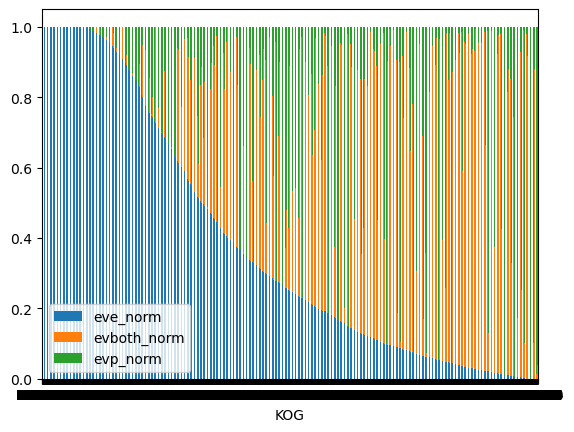

In [96]:
koghmm_eval_e_vis = koghmm_eval_e.loc[:, ["eve_norm", "evboth_norm", "evp_norm"]]
koghmm_eval_e_vis.plot.bar(rot=0, stacked=True)

### investigate low quality prokaryotic HMMs

In [71]:
prok_bothdomainhits = prok_domainhits[prok_domainhits["euktarget"].astype(bool) & prok_domainhits["proktarget"].astype(bool)]
prok_eukdomainhits = prok_domainhits[prok_domainhits["euktarget"].astype(bool) & ~prok_domainhits["proktarget"].astype(bool)]
prok_prokdomainhits = prok_domainhits[~prok_domainhits["euktarget"].astype(bool) & prok_domainhits["proktarget"].astype(bool)]

In [72]:
prok_missedprok = prok_eukdomainhits[prok_eukdomainhits["KOG"].isin(relevant_kogs)]
prok_hitboth = prok_bothdomainhits[prok_bothdomainhits["KOG"].isin(relevant_kogs)]
prok_justprok = prok_prokdomainhits[prok_prokdomainhits["KOG"].isin(relevant_kogs)]

In [73]:
pvp_counts = prok_justprok["KOG"].value_counts()
pvboth_counts = prok_hitboth["KOG"].value_counts()
pve_counts = prok_missedprok["KOG"].value_counts()
tmp_merge = pd.merge(pvp_counts, pvboth_counts, how = "outer", on = "KOG")
tmp_eval = pd.merge(tmp_merge, pve_counts, how = "outer", on = "KOG").rename(columns={"count_x": "pvp", "count_y": "pvboth", "count": "pve"}).fillna(0)

In [74]:
tmp_eval["pvp_norm"] = tmp_eval["pvp"] / (tmp_eval["pvp"] + tmp_eval["pvboth"] + tmp_eval["pve"])
tmp_eval["pvboth_norm"] = tmp_eval["pvboth"] / (tmp_eval["pvp"] + tmp_eval["pvboth"] + tmp_eval["pve"])
tmp_eval["pve_norm"] = tmp_eval["pve"] / (tmp_eval["pvp"] + tmp_eval["pvboth"] + tmp_eval["pve"])

In [77]:
koghmm_eval_p = tmp_eval.sort_values(["pvp_norm", "pvp"], ascending = False)
koghmm_eval_p_asc = tmp_eval.sort_values(["pve_norm", "pve"])

<Axes: xlabel='KOG'>

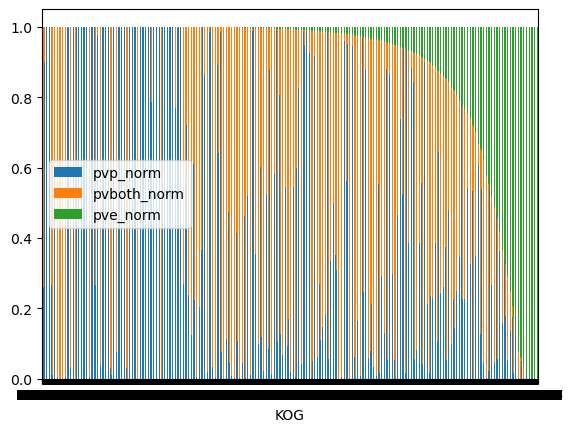

In [80]:
koghmm_eval_p_asc_vis = koghmm_eval_p_asc.loc[:, ["pvp_norm", "pvboth_norm", "pve_norm"]]
koghmm_eval_p_asc_vis.plot.bar(rot=0, stacked=True)

<Axes: xlabel='KOG'>

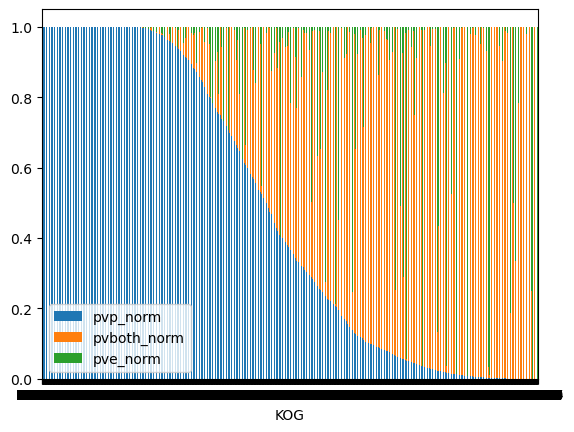

In [81]:
koghmm_eval_p_vis = koghmm_eval_p.loc[:, ["pvp_norm", "pvboth_norm", "pve_norm"]]
koghmm_eval_p_vis.plot.bar(rot=0, stacked=True)

### summary stats

In [ ]:
pvekog = accessions_prok_rel[accessions_prok_rel.euktarget == True]["KOG"].value_counts()
pvpkog = accessions_prok_rel[accessions_prok_rel.proktarget == True]["KOG"].value_counts()
evekog = accessions_euk_rel[accessions_euk_rel.euktarget == True]["KOG"].value_counts()
evpkog = accessions_euk_rel[accessions_euk_rel.proktarget == True]["KOG"].value_counts()

In [ ]:
pvallkog = pd.concat([pvekog, pvpkog])
evallkog = pd.concat([evpkog, evekog])
plotA, dfA = plot_cumsum_counts(pvallkog, x_min = 1, plot_type = "default", title = "prok hits vs all kogs")
plotB, dfB = plot_cumsum_counts(evallkog, x_min = 1, plot_type = "default", title = "euk hits vs all kogs")
unfiltered_data_vall = pd.concat([dfA, dfB])
plot, data = plot_cumsum_counts(unfiltered_data_vall, formatted_data=True, title='microcosm size breakdown', plot_type='default', x_label = "hits per kog")
plot

In [ ]:
plot1, df1 = plot_cumsum_counts(pvekog, x_min = 1, plot_type = "default", title = "prok hits vs euk kog")
plot2, df2 = plot_cumsum_counts(pvpkog, x_min = 1, plot_type = "default", title = "prok hits vs prok kog")
plot3, df3 = plot_cumsum_counts(evekog, x_min = 1, plot_type = "default", title = "euk hits vs euk kog")
plot4, df4 = plot_cumsum_counts(evpkog, x_min = 1, plot_type = "default", title = "euk hits vs prok kog")
unfiltered_data = pd.concat([df1, df2, df3, df4])
plot, data = plot_cumsum_counts(unfiltered_data, formatted_data=True, title='microcosm size breakdown', plot_type='default', x_label = "hits per kog")
plot

In [ ]:
plot1, df1 = plot_cumsum_counts(pvekog, x_min = 1, plot_type = "default", title = "prok hits vs euk kog")
plot2, df2 = plot_cumsum_counts(pvpkog, x_min = 1, plot_type = "default", title = "prok hits vs prok kog")
plot3, df3 = plot_cumsum_counts(evekog, x_min = 1, plot_type = "default", title = "euk hits vs euk kog")
plot4, df4 = plot_cumsum_counts(evpkog, x_min = 1, plot_type = "default", title = "euk hits vs prok kog")
unfiltered_data = pd.concat([df1, df2, df3, df4])
plot, data = plot_cumsum_counts(unfiltered_data, formatted_data=True, title='microcosm size breakdown', plot_type='default', x_label = "hits per kog")
plot

In [25]:
# kogids = accessions_prok_out["Target"]
# queryids = accessions_prok_out["Query"]
# for i in range(len(accessions_prok_out)):
#     kogid, uid = kogids[i], queryids[i]
#     outpath = f"/data/luojaa/eukgen/processing/microcosm_enriched/{kogid}/{kogid}.target.acc"
#     with open(outpath, "w") as outfile:
#         print(uid, file=outfile)

In [ ]:
# kogids = accessions_euk_out["Target"]
# queryids = accessions_euk_out["Query"]
# for i in range(len(accessions_euk_out)):
#     kogid, uid = kogids[i], queryids[i]
#     outpath = f"/data/luojaa/eukgen/processing/microcosm_enriched/{kogid}/{kogid}.query.acc"
#     try:
#         # with open(outpath, "w") as outfile:
#         #     print(uid, file=outfile)
#         os.listdir(f"/data/luojaa/eukgen/processing/microcosm_enriched/{kogid}")
#     except:
#         print(kogid)

In [27]:
prok_target_set = set(accessions_prok["Target"])
kogswboth_set = set(relevant_kogs)

In [46]:
euk_target_set = set(accessions_euk["Target"])
noeuk = list(kogswboth_set.difference(euk_target_set))

In [28]:
prok_allhits_set = set(hhresults_df["Target"])

In [50]:
# for kogid in noeuk:
#     os.system(f"rm -R /data/luojaa/eukgen/processing/microcosm_enriched/{kogid}/")

rm: cannot remove '/data/luojaa/eukgen/processing/microcosm_enriched/K19720/': No such file or directory


In [30]:
# for kogid in noprok:
#     os.system(f"rmdir /data/luojaa/eukgen/processing/microcosm_enriched/{kogid}/")

In [29]:
noprok = list(kogswboth_set.difference(prok_target_set))

In [86]:
kogswboth_hits_set = prok_target_set.intersection(euk_target_set)

### for taxonomy report


In [72]:
# for taxonomy report

euk_both = hhresults_euk_knum[hhresults_euk_knum["Target"].isin(kogswboth_hits_set)]
prok_both = hhresults_knum[hhresults_knum["Target"].isin(kogswboth_hits_set)]

In [91]:
euk_both_ids = set(euk_both["Query"])
prok_both_ids = set(prok_both["Query"])

In [92]:

with open("/data/luojaa/eukgen/mmseqs_victor/ran_euk/bothdomains.ids", "w") as outfile:
    for queryid in euk_both_ids:
        print(queryid,file=outfile)

In [95]:
with open("/data/luojaa/eukgen/mmseqs_victor/ran_prok/bothdomains.ids", "w") as outfile:
    for queryid in prok_both_ids:
        print(queryid,file=outfile)

In [101]:
len(prok_both_ids)

4492081